In [1]:
#python specific stuff
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import *


In [2]:
## INITIALIZATION for time
total_time_h=3 #hours
t_step=30 #s
total_time_s=total_time_h*60*60
N_t_steps=int(total_time_s/t_step)

In [3]:
# # UPPER ROOM INITIALIZATION #########################

#SI units only =m, s, kg, C
 
#this room is where the heat is added and is the starting point of calculation (for the moment we are assuming it is the upper part
#for the surfaces, the outside edge is fixed at it's initial_T
#OUTPUT SURFACE INITIALIZATION
#use function output_surface_parameters() to define parameters

#output_surface_parameters;
#(THcond,HTC,densityC,thickness,area,N_cells,initial_T) ->see functions.py for more details
N_cells=10
initial_T=10
ceil=output_surface_parameters(0.1,6.4,494000,0.05,500,N_cells,initial_T)

wall_upper=output_surface_parameters(1.3,6.4,1680000,0.175,250,N_cells,initial_T)
windows=output_surface_parameters(1.3,6.4,1680000,0.175,250,N_cells,initial_T)
output_surface_array_upper=[ceil,wall_upper]

#ROOM PARAMETERS
T_room_upper=initial_T 
Qin_upper=0 # some constant value set by heaters
#Qin_upper=71874;
volume_room_upper=1630.43
densityC_room_upper =1206
U_upper=70 # this is for conductive heat to the lower level??

# LOWER ROOM INITIALIZATION #########################

#OUTPUT SURFACE INITIALIZATION
floor=output_surface_parameters(1.3,6.4,1680000,0.175,500,N_cells,initial_T)
wall_lower=output_surface_parameters(1.3,6.4,1680000,0.175,210,N_cells,initial_T)
output_surface_array_lower=[wall_lower,floor]

#ROOM PARAMETERS
T_room_lower=initial_T
volume_room_lower=1369.565
densityC_room_lower =1206
Qin_lower=71874
#Qin_lower=0;
U_lower=70

In [4]:
## DO CALCULATION ##################

data_array_T_room_upper=np.zeros(int(N_t_steps))
data_array_T_room_lower=np.zeros(int(N_t_steps))
data_array_T_wall_lower=np.zeros(int(N_t_steps))
data_array_T_wall_upper=np.zeros(int(N_t_steps))
data_array_T_ceil=np.zeros(int(N_t_steps))
data_array_T_floor=np.zeros(int(N_t_steps))

Qout_lower_to_upper=0;
Qout_upper_to_lower=0;

for t in range(N_t_steps):

    data_array_T_room_upper[t]=T_room_upper
    data_array_T_room_lower[t]=T_room_lower
    data_array_T_wall_lower[t]=wall_lower.T_array[0]
    data_array_T_wall_upper[t]=wall_upper.T_array[0]
    data_array_T_ceil[t]=ceil.T_array[0]
    data_array_T_floor[t]=floor.T_array[0]
    
    #do surfaces in upper room
    [Qout_room_total,output_surface_array_upper]=do_surfaces_in_room(output_surface_array_upper,T_room_upper,t_step)
    
    #now conductive to lower room - this is ok even if the heat input is reversed?
    Qout_upper_to_lower=calculate_Qout_convective(U_upper,ceil.area,T_room_upper,T_room_lower)
    Qout_room_total=Qout_room_total+Qout_upper_to_lower
    
    #update Temp of room using Qins and Qouts
    T_room_upper=T_room_upper+calculate_Tchange(Qin_upper+Qout_lower_to_upper,Qout_room_total,t_step,densityC_room_upper,volume_room_upper)
    
    #do surfaces in upper room                                          
    [Qout_room_total,output_surface_array_lower]=do_surfaces_in_room(output_surface_array_lower,T_room_lower,t_step)
    
    #update Temp of room using Qins and Qouts
    T_room_lower=T_room_lower+calculate_Tchange(Qin_lower+Qout_upper_to_lower,Qout_room_total,t_step,densityC_room_lower,volume_room_lower)

Text(0, 0.5, 'Temperature (C)')

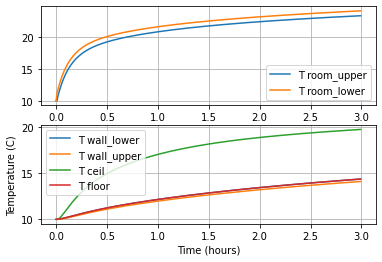

In [5]:
# MAKE PLOTS ##########################
fig, axs = plt.subplots(2)
t_array=np.arange(0,N_t_steps*t_step,t_step)/(60*60)
axs[0].plot(t_array,data_array_T_room_upper,label='T room_upper')
axs[0].plot(t_array,data_array_T_room_lower,label='T room_lower')
axs[0].legend()
axs[0].grid('True')
axs[1].plot(t_array,data_array_T_wall_lower,label='T wall_lower')
axs[1].plot(t_array,data_array_T_wall_upper,label='T wall_upper')
axs[1].plot(t_array,data_array_T_ceil,label='T ceil')
axs[1].plot(t_array,data_array_T_floor,label='T floor')
axs[1].legend()
axs[1].grid('True')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (C)')

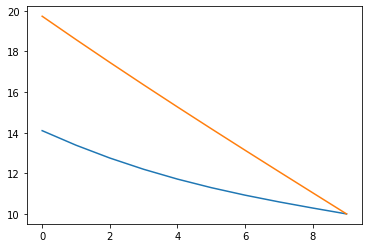

In [6]:
plt.plot(wall_upper.T_array)
plt.plot(ceil.T_array)

0.7555567168695667
0.017499999999999998


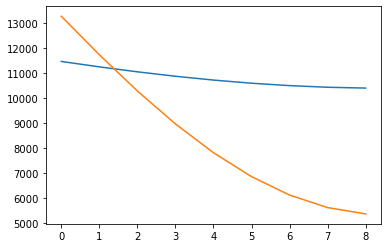

In [7]:
print(floor.T_array[0]-floor.T_array[1])
print(floor.cell_length)

plt.plot(ceil.Qout_array)
plt.plot(wall_upper.Qout_array)